# Libs

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Load data

In [2]:
genome_tags = pd.read_csv("movies-database/ml-25m/genome-tags.csv")
genome_scores = pd.read_csv("movies-database/ml-25m/genome-scores.csv")
movies = pd.read_csv("movies_ratings_tags_missingids.csv")

# Convert the JSON string back to list (safely handle empty strings)
movies['tags'] = movies['tags'].apply(
    lambda x: json.loads(x) if pd.notna(x) and x.strip() else []
)

# Convert the JSON string back to dict (safely handle empty strings)
movies['ratings'] = movies['ratings'].apply(
    lambda x: json.loads(x) if pd.notna(x) and x.strip() else {}
)

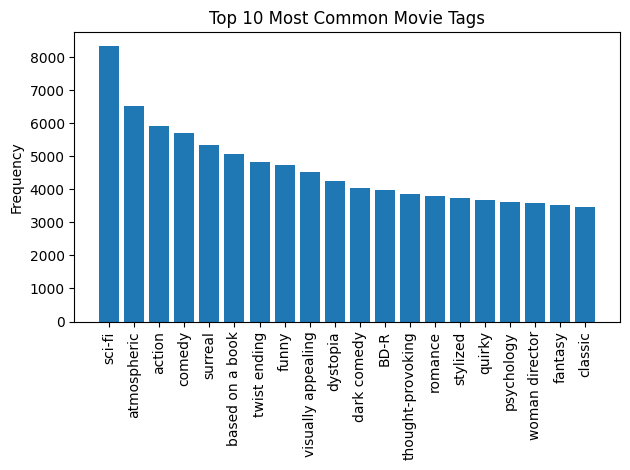

In [3]:
from collections import Counter

all_tags = [tag for tags in movies['tags'] for tag in tags]
top_tags = Counter(all_tags).most_common(20)

tags_, counts = zip(*top_tags)

import matplotlib.pyplot as plt
plt.bar(tags_, counts)
plt.xticks(rotation=90)
plt.title("Top 10 Most Common Movie Tags")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [4]:
len(all_tags)

1093360

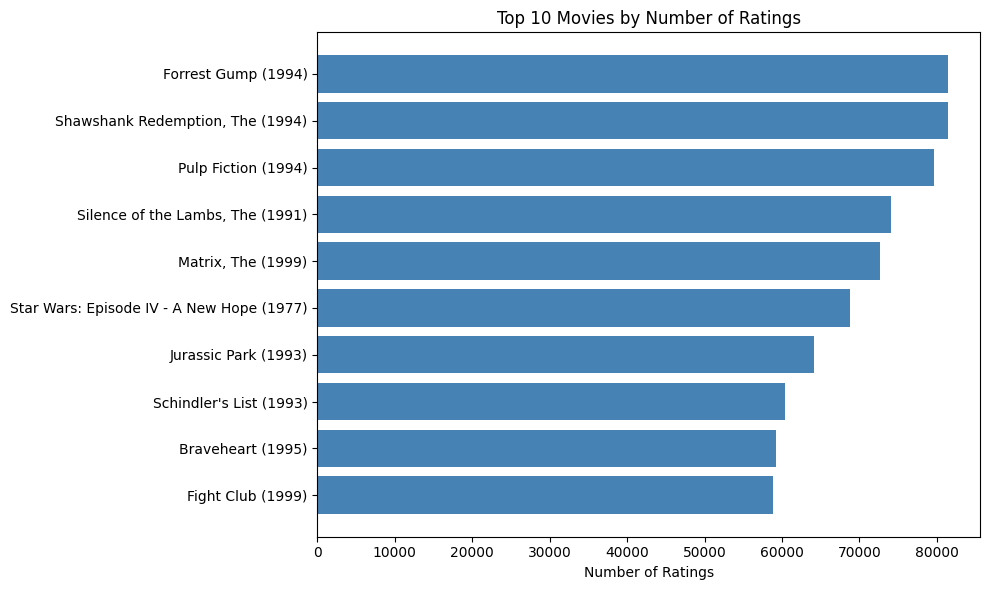

In [5]:
# Count number of ratings per movie using the length of the dict
movies['num_ratings'] = movies['ratings'].apply(lambda r: len(r) if isinstance(r, dict) else 0)

# Get top 10 movies by number of ratings
top_10 = movies.sort_values('num_ratings', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_10['title'], top_10['num_ratings'], color='steelblue')
plt.xlabel("Number of Ratings")
plt.title("Top 10 Movies by Number of Ratings")
plt.gca().invert_yaxis()  # Show most-rated movie at the top
plt.tight_layout()
plt.show()

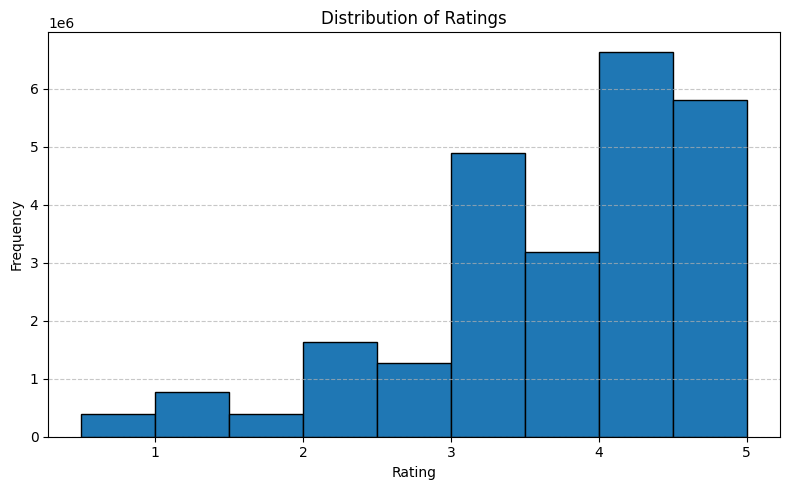

In [6]:
ratings = pd.read_csv("movies-database/ml-25m/ratings.csv")
plt.figure(figsize=(8, 5))
plt.hist(ratings['rating'], bins=[0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], edgecolor='black')
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Ratings")
plt.xticks([1, 2, 3, 4, 5])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

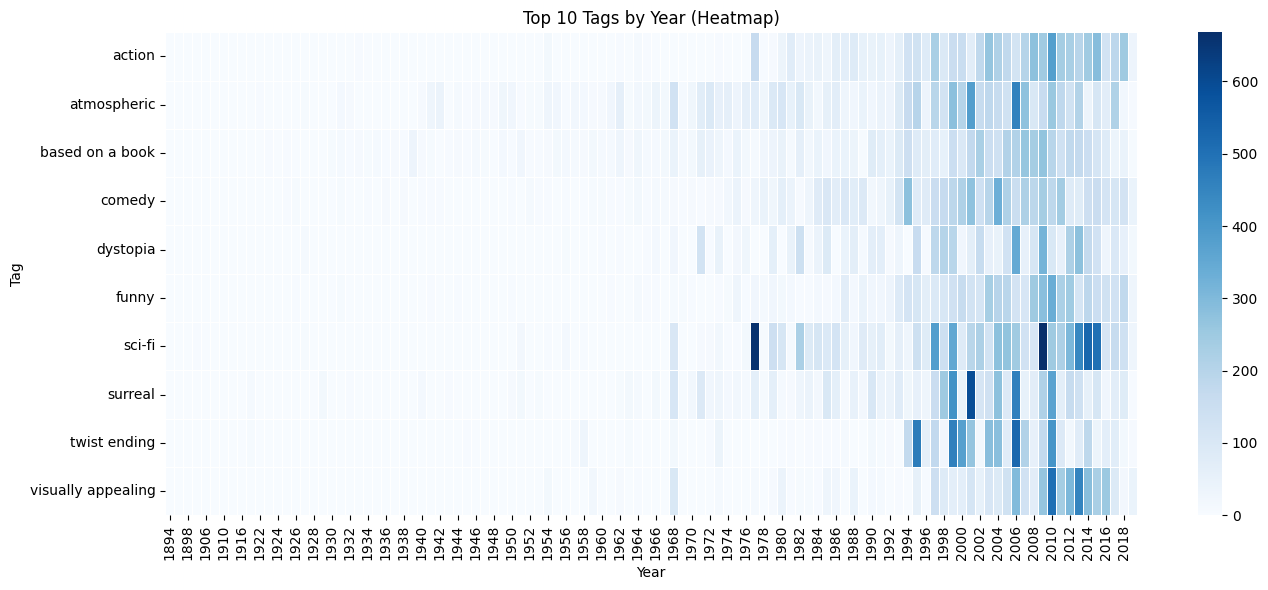

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)').astype('Int64')
# 1. Get the exploded tag-year DataFrame (if not already done)
exploded_tags = movies[['year', 'tags']].explode('tags').dropna()

# 2. Count all tags to get top 10 globally
top_tags = exploded_tags['tags'].value_counts().head(10).index.tolist()

# 3. Filter to only top tags
filtered_tags = exploded_tags[exploded_tags['tags'].isin(top_tags)]

# 4. Create pivot table: rows = tags, columns = years, values = count
tag_year_matrix = filtered_tags.groupby(['tags', 'year']).size().unstack(fill_value=0)

# 5. Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(tag_year_matrix, cmap='Blues', fmt='d', linewidths=0.5)
plt.title("Top 10 Tags by Year (Heatmap)")
plt.ylabel("Tag")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


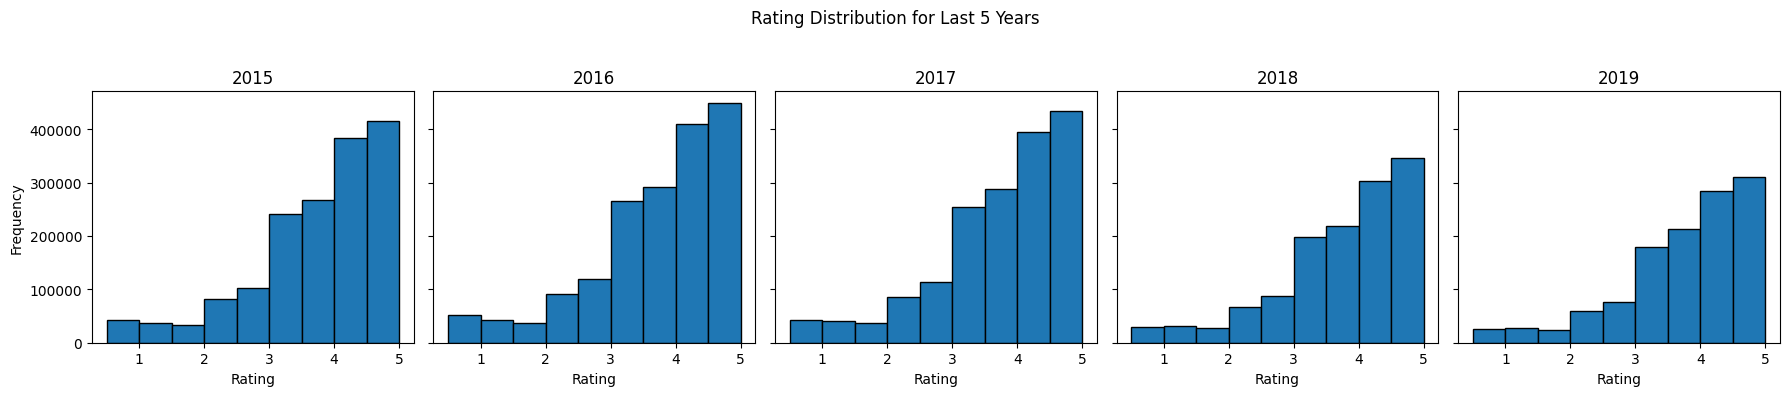

In [10]:
ratings['datetime'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['year'] = ratings['datetime'].dt.year

# Get last 5 years present in the dataset
last_5_years = sorted(ratings['year'].dropna().unique())[-5:]

# Create subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 4), sharey=True)

for i, year in enumerate(last_5_years):
    ax = axes[i]
    year_data = ratings[ratings['year'] == year]
    ax.hist(year_data['rating'], bins=[0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], edgecolor='black')
    ax.set_title(f'{year}')
    ax.set_xticks([1, 2, 3, 4, 5])
    if i == 0:
        ax.set_ylabel("Frequency")
    ax.set_xlabel("Rating")

fig.suptitle("Rating Distribution for Last 5 Years")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

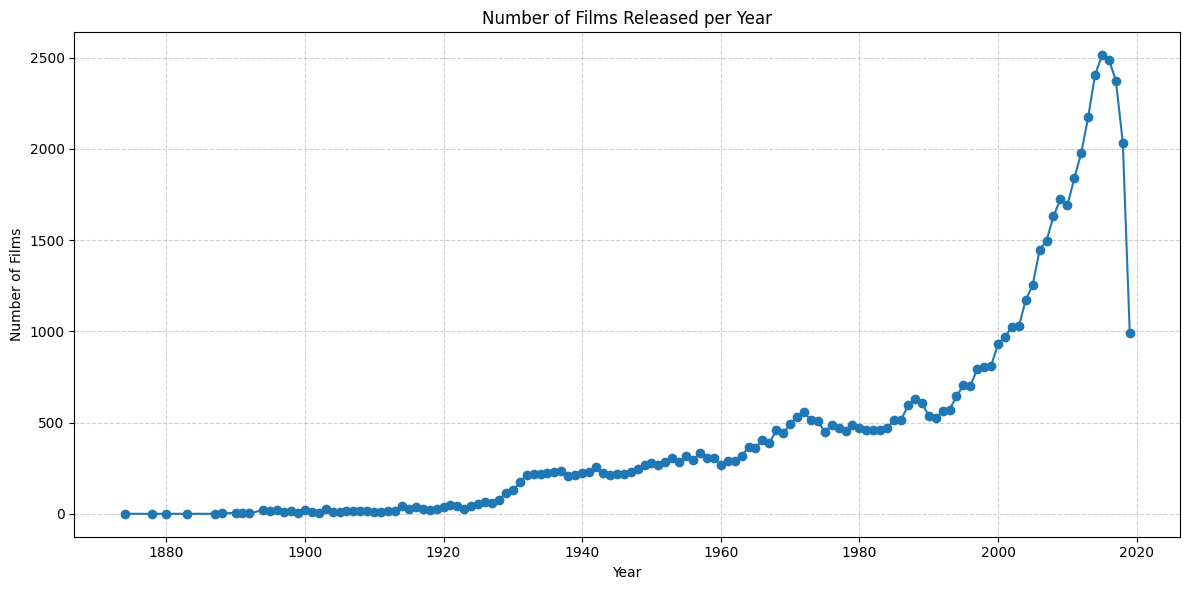

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract year from title
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)').astype('Int64')

# Count number of films per year
films_per_year = movies['year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(films_per_year.index, films_per_year.values, marker='o', linestyle='-')
plt.title("Number of Films Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Films")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


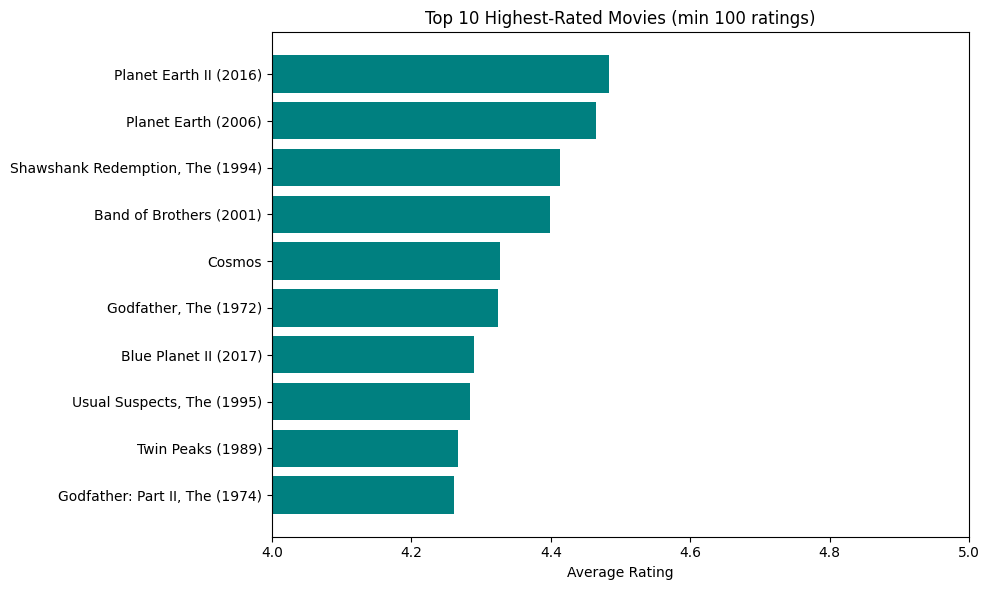

In [12]:
# 1. Calculate average rating and count of ratings for each movie
movies['num_ratings'] = movies['ratings'].apply(lambda r: len(r) if isinstance(r, dict) else 0)
movies['avg_rating'] = movies['ratings'].apply(
    lambda r: sum(r.values()) / len(r) if isinstance(r, dict) and len(r) > 0 else None
)

# 2. Filter movies with at least 100 ratings
filtered = movies[movies['num_ratings'] >= 100]

# 3. Get top 10 by average rating
top_10_avg = filtered.sort_values('avg_rating', ascending=False).head(10)

# 4. Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_10_avg['title'], top_10_avg['avg_rating'], color='teal')
plt.xlabel("Average Rating")
plt.title("Top 10 Highest-Rated Movies (min 100 ratings)")
plt.xlim(4, 5)  # Ratings are usually in the 0-5 range
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


/tmp/ipykernel_3054/272433531.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  genre_stats = genre_df.groupby('genres').apply(


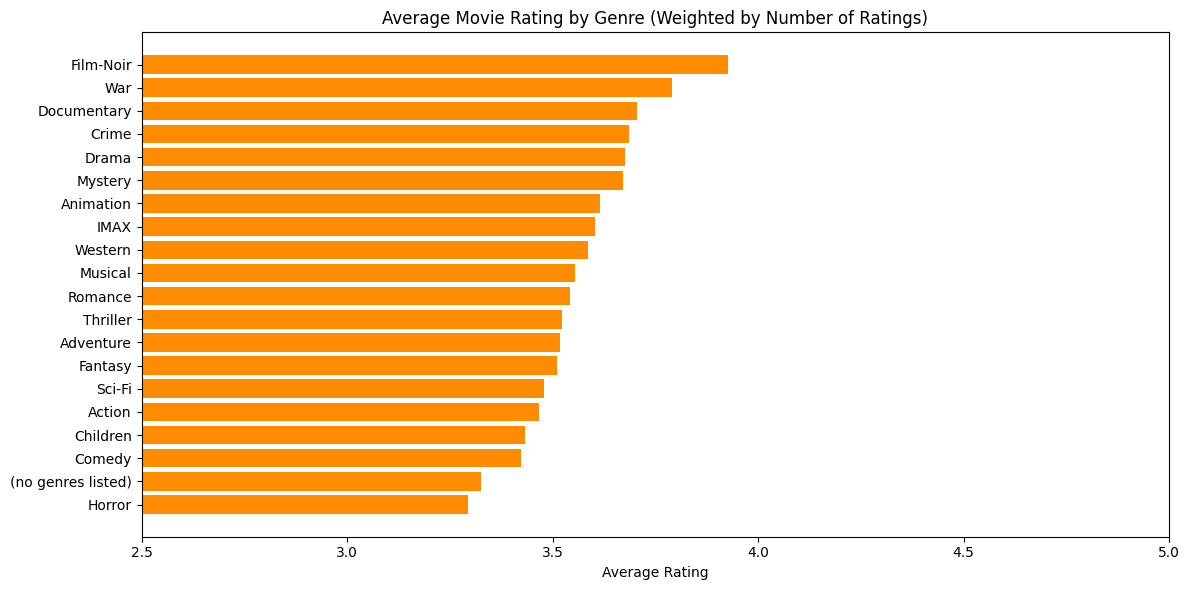

In [13]:
# 1. Make sure ratings are available
movies['num_ratings'] = movies['ratings'].apply(lambda r: len(r) if isinstance(r, dict) else 0)
movies['avg_rating'] = movies['ratings'].apply(
    lambda r: sum(r.values()) / len(r) if isinstance(r, dict) and len(r) > 0 else None
)

# 2. Split genres and explode
genre_df = movies[['genres', 'avg_rating', 'num_ratings']].dropna()
genre_df['genres'] = genre_df['genres'].str.split('|')
genre_df = genre_df.explode('genres')

# 3. Group by genre and calculate weighted average
genre_stats = genre_df.groupby('genres').apply(
    lambda df: pd.Series({
        'average_rating': (df['avg_rating'] * df['num_ratings']).sum() / df['num_ratings'].sum(),
        'num_movies': len(df),
        'total_ratings': df['num_ratings'].sum()
    })
).reset_index()

# 4. Sort and plot
import matplotlib.pyplot as plt

genre_stats = genre_stats.sort_values('average_rating', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(genre_stats['genres'], genre_stats['average_rating'], color='darkorange')
plt.xlabel("Average Rating")
plt.title("Average Movie Rating by Genre (Weighted by Number of Ratings)")
plt.xlim(2.5, 5)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


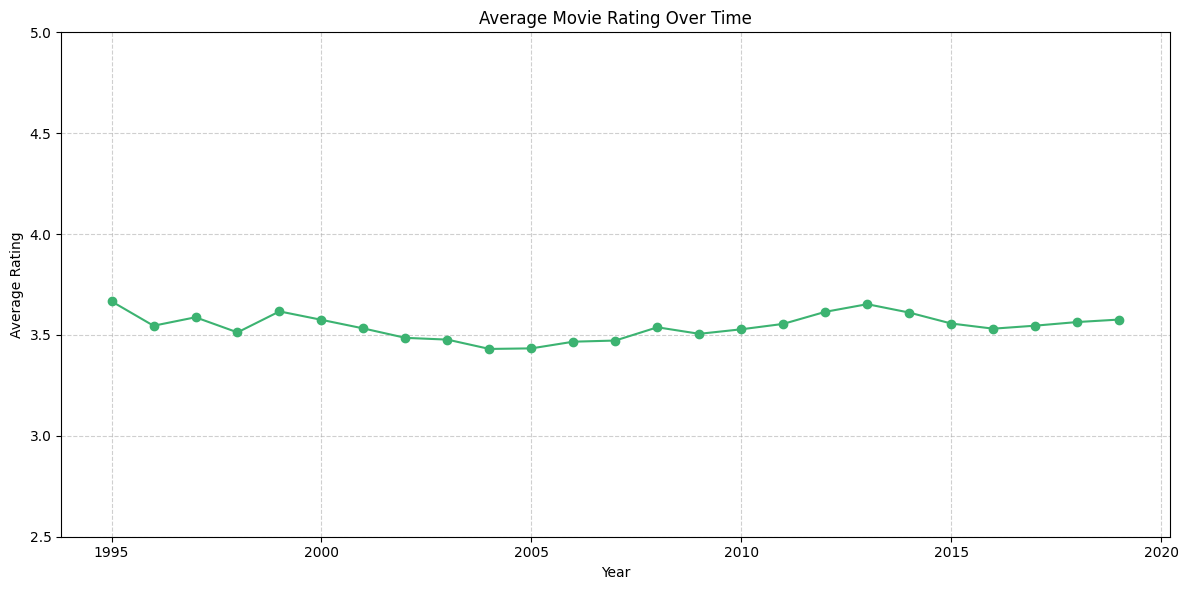

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by year and calculate average rating
avg_rating_by_year = ratings.groupby('year')['rating'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(avg_rating_by_year.index, avg_rating_by_year.values, marker='o', color='mediumseagreen')
plt.title("Average Movie Rating Over Time")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(2.5, 5)
plt.tight_layout()
plt.show()


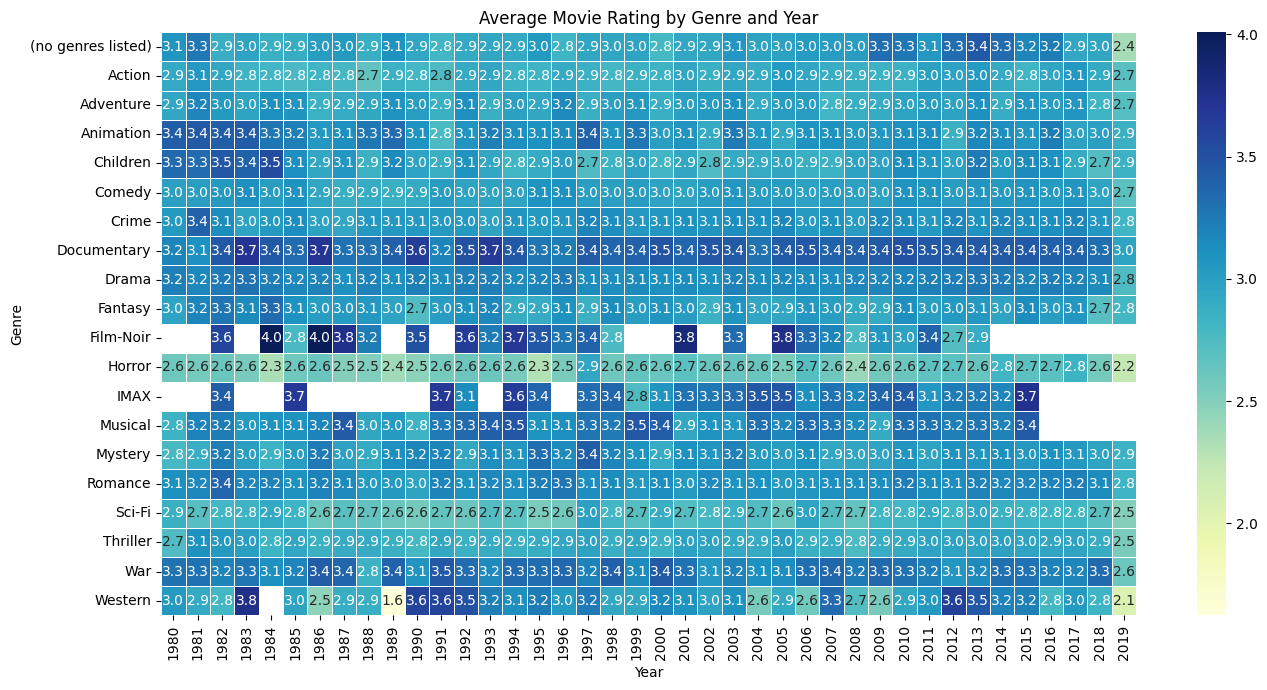

In [15]:
# 2. Explode genres
genre_year_df = movies[['year', 'genres', 'avg_rating']].dropna()
genre_year_df['genres'] = genre_year_df['genres'].str.split('|')
genre_year_df = genre_year_df.explode('genres')

# 3. Group by year and genre
heatmap_data = genre_year_df.groupby(['genres', 'year'])['avg_rating'].mean().unstack(fill_value=None)

# 4. Filter to relevant years (e.g., after 1980) and genres with enough data
heatmap_data = heatmap_data.loc[:, heatmap_data.columns >= 1980]
top_genres = heatmap_data.dropna(axis=0, thresh=5).index  # genres with ratings in at least 5 years
heatmap_data = heatmap_data.loc[top_genres]

# 5. Plot heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Average Movie Rating by Genre and Year")
plt.xlabel("Year")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

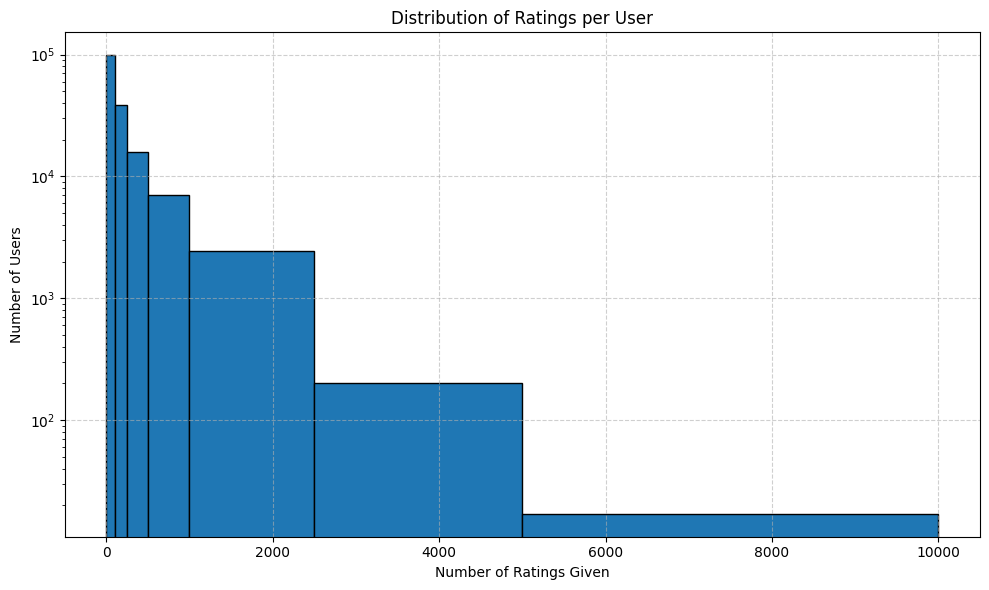

In [17]:


# Count ratings per user
user_activity = ratings['userId'].value_counts()

# Plot histogram (log scale to capture long tail)
plt.figure(figsize=(10, 6))
plt.hist(user_activity, bins=[0, 100, 250, 500, 1000, 2500, 5000, 10000], edgecolor='black')
plt.xlabel("Number of Ratings Given")
plt.ylabel("Number of Users")
plt.title("Distribution of Ratings per User")
plt.yscale("log")  # Helps visualize long tail
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [18]:
ratings['userId'].value_counts()

userId
72315     32202
80974      9178
137293     8913
33844      7919
20055      7488
          ...  
74454        20
17709        20
21585        20
21581        20
53936        20
Name: count, Length: 162541, dtype: int64

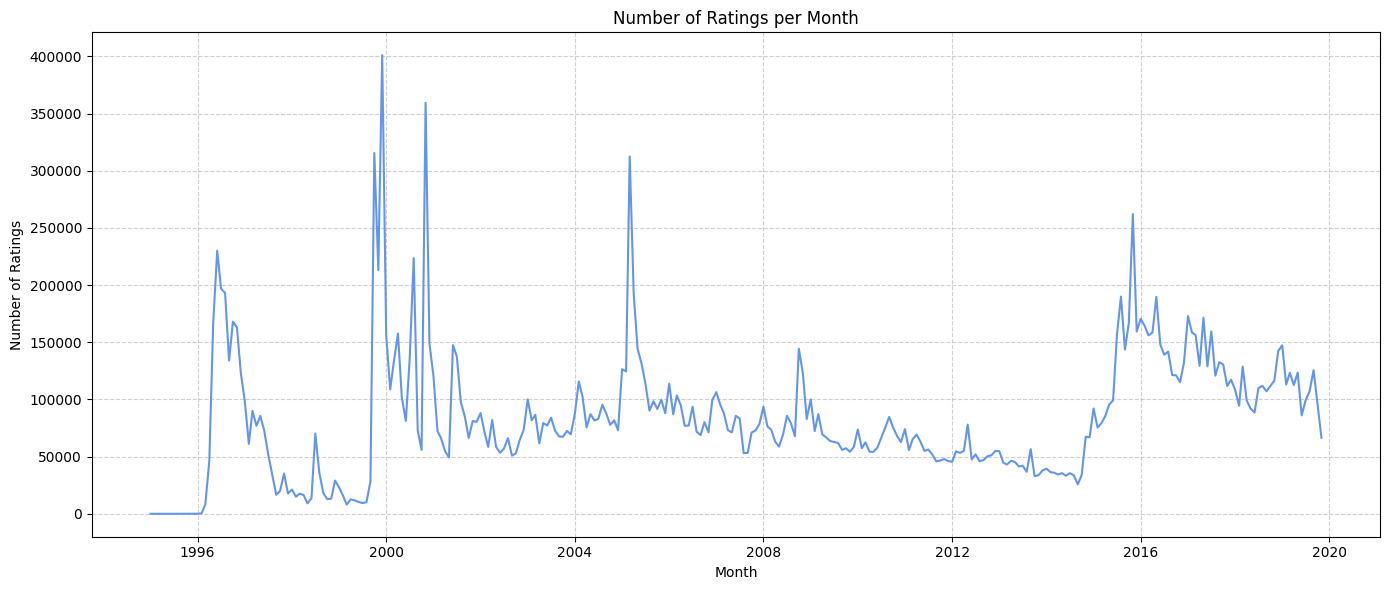

In [19]:
# Group by month
ratings['month'] = ratings['datetime'].dt.to_period('M').dt.to_timestamp()
monthly_counts = ratings.groupby('month').size()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(monthly_counts.index, monthly_counts.values, color='cornflowerblue')
plt.title("Number of Ratings per Month")
plt.xlabel("Month")
plt.ylabel("Number of Ratings")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

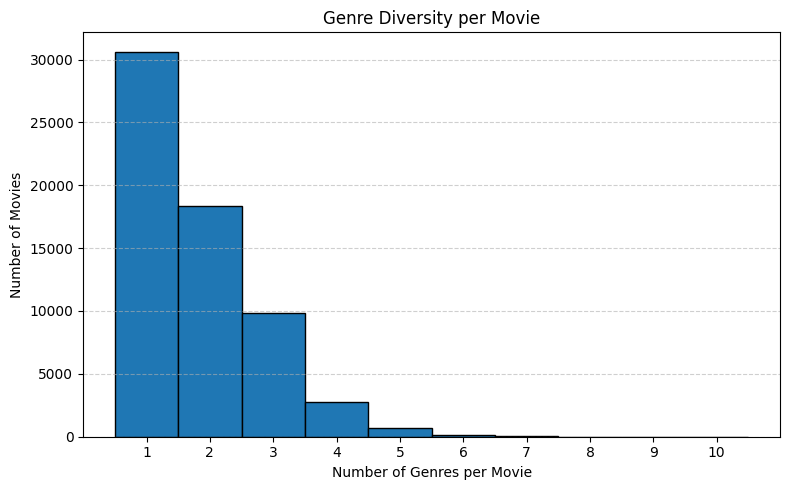

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Split genres and count how many each movie has
movies['genre_count'] = movies['genres'].apply(lambda x: len(x.split('|')) if pd.notna(x) else 0)

# Plot
plt.figure(figsize=(8, 5))
plt.hist(movies['genre_count'], bins=range(1, movies['genre_count'].max() + 2), align='left', edgecolor='black')
plt.xlabel("Number of Genres per Movie")
plt.ylabel("Number of Movies")
plt.title("Genre Diversity per Movie")
plt.xticks(range(1, movies['genre_count'].max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
